In [ ]:
!pip install transformers torchaudio librosa soundfile datasets scikit-learn matplotlib tqdm

In [ ]:
!pip install torchcodec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
ds = load_dataset("DarshanaS/IndicAccentDb")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

IndicAccentDB.zip:   0%|          | 0.00/3.20G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8116 [00:00<?, ? examples/s]

In [ ]:
# import numpy as np

# # example: load one audio
# sample = ds["train"][0]
# audio = sample["audio"]["array"]
# sr = sample["audio"]["sampling_rate"]

# # extract MFCCs
# import librosa
# mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
# print(mfcc.shape)


In [ ]:
# import numpy as np
# import pandas as pd

# mfcc_data = []

# for s in ds["train"]:
#     y = s["audio"]["array"]
#     sr = s["audio"]["sampling_rate"]
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
#     mfcc_mean = mfcc.mean(axis=1)
#     mfcc_data.append(mfcc_mean)

# df = pd.DataFrame(mfcc_data)
# df.to_csv("indic_accent_mfcc.csv", index=False)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/label+mfcc dataset.csv')
df.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12
0,andhra_pradesh,-592.50800,117.569750,23.228537,27.814180,14.872972,11.756241,-11.556996,-14.262320,-10.682663,-8.172003,-8.100637,-7.105029,-6.507300
1,andhra_pradesh,-578.28265,117.583270,-2.621122,20.584381,6.302611,10.654482,-25.593641,-8.793226,-4.985946,-5.003223,-4.145067,-7.616850,-9.861750
2,andhra_pradesh,-588.28160,105.255264,28.282260,42.210945,-16.812231,14.867346,-15.237608,-9.027327,-1.419095,-7.653564,-6.645215,-7.885378,-1.230812
3,andhra_pradesh,-392.57407,148.160430,-12.076679,13.926112,19.155872,-4.822971,2.364100,-8.394357,-10.754920,-3.584077,-11.703759,-5.251467,0.785428
4,andhra_pradesh,-351.18283,152.348940,-24.105532,16.026981,28.991026,-4.253864,-1.840305,-8.965336,-9.604343,-5.470785,-12.013433,-1.714338,1.653527


In [ ]:
df.isnull().sum()

,0
label,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


/tmp/ipython-input-1725757023.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['label'], sort = True)


Text(0, 0.5, 'Frequency')

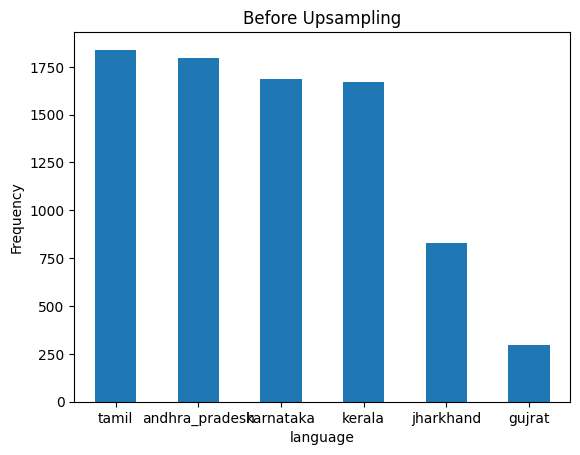

In [ ]:
count_classes = pd.value_counts(df['label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Before Upsampling")
plt.xticks()
plt.xlabel("language")
plt.ylabel("Frequency")

In [ ]:
df['label'].value_counts()

,count
label,
tamil,1840
andhra_pradesh,1794
karnataka,1686
kerala,1671
jharkhand,827
gujrat,298


In [ ]:
from imblearn.over_sampling import SMOTE
x = df.drop(['label'], axis=1)
y = df.label
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-592.50800,117.569750,23.228537,27.814180,14.872972,11.756241,-11.556996,-14.262320,-10.682663,-8.172003,-8.100637,-7.105029,-6.507300
1,-578.28265,117.583270,-2.621122,20.584381,6.302611,10.654482,-25.593641,-8.793226,-4.985946,-5.003223,-4.145067,-7.616850,-9.861750
2,-588.28160,105.255264,28.282260,42.210945,-16.812231,14.867346,-15.237608,-9.027327,-1.419095,-7.653564,-6.645215,-7.885378,-1.230812
3,-392.57407,148.160430,-12.076679,13.926112,19.155872,-4.822971,2.364100,-8.394357,-10.754920,-3.584077,-11.703759,-5.251467,0.785428
4,-351.18283,152.348940,-24.105532,16.026981,28.991026,-4.253864,-1.840305,-8.965336,-9.604343,-5.470785,-12.013433,-1.714338,1.653527


In [ ]:
x.shape, y.shape
smk = SMOTE(random_state=15)
x_res,y_res=smk.fit_resample(x, y)

In [ ]:
x_res.shape, y_res.shape

((11040, 13), (11040,))

In [ ]:
y_res.value_counts()

,count
label,
andhra_pradesh,1840
gujrat,1840
jharkhand,1840
karnataka,1840
kerala,1840
tamil,1840


/tmp/ipython-input-719537533.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(y_res, sort = True)


Text(0, 0.5, 'Frequency')

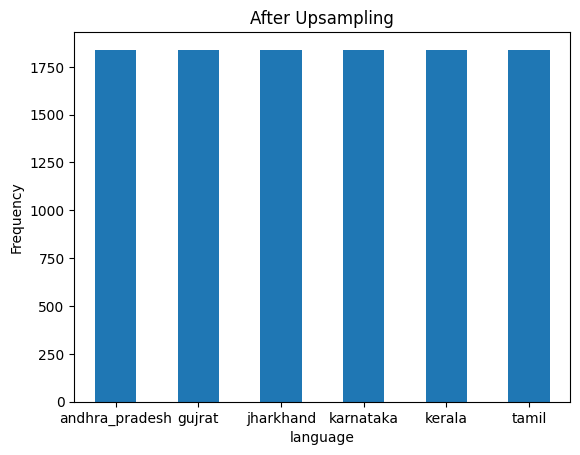

In [ ]:
count_classes = pd.value_counts(y_res, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("After Upsampling")
plt.xticks()
plt.xlabel("language")
plt.ylabel("Frequency")

In [ ]:
y_res, labels = pd.factorize(y_res)

print(labels)

Index(['andhra_pradesh', 'gujrat', 'jharkhand', 'karnataka', 'kerala',
       'tamil'],
      dtype='object')


In [ ]:
y.head()

,label
0,andhra_pradesh
1,andhra_pradesh
2,andhra_pradesh
3,andhra_pradesh
4,andhra_pradesh


In [ ]:
#Standarization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.193020,-0.580659,0.548669,0.816285,1.531261,0.634500,-0.347119,-1.532056,-0.651371,-0.862988,-0.412370,-0.723864,-0.803163
1,-2.019559,-0.579980,-0.752314,0.340933,0.866696,0.539360,-1.708687,-0.748081,0.240564,-0.324709,0.259696,-0.829754,-1.467243
2,-2.141484,-1.199351,0.803016,1.762858,-0.925681,0.903154,-0.704142,-0.781639,0.799026,-0.774921,-0.165089,-0.885309,0.241423
3,0.244926,0.956246,-1.228200,-0.096842,1.863367,-0.797165,1.003242,-0.690905,-0.662685,-0.083639,-1.024553,-0.340382,0.640577
4,0.749641,1.166681,-1.833598,0.041288,2.626007,-0.748021,0.595410,-0.772752,-0.482539,-0.404133,-1.077168,0.391411,0.812435


train and test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=5)

In [ ]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7728, 13)
(3312, 13)
(7728,)
(3312,)


ml algo implement

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_accuracy = knn.score(x_test, y_test)
knn_accuracy

0.990036231884058

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5)
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
dt_accuracy=dt.score(x_test, y_test)
dt_accuracy

0.9423309178743962

In [ ]:
from sklearn.svm import SVC
svc= SVC(random_state=5)
svc.fit(x_train,y_train)
svc_accuracy = svc.score(x_test, y_test)
svc_accuracy

0.8369565217391305

In [ ]:
#Random Forest with best accuracy
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(random_state=5)
randf.fit(x_train,y_train)
pred_randf = randf.predict(x_test)
#pred_randf_with_categorical_value = le.inverse_transform(pred_randf)
#print(pred_randf_with_categorical_value)
randf_accuracy = randf.score(x_test, y_test)
randf_accuracy

0.9945652173913043

In [ ]:
print(pred_randf.shape)

(3312,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=5)
logreg.fit(x_train, y_train)
logreg_accuracy=logreg.score(x_test, y_test)
logreg_accuracy

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7971014492753623

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_accuracy=nb.score(x_test, y_test)
nb_accuracy

0.7548309178743962

saving ml model

In [ ]:

import joblib as jb

In [ ]:
import joblib

joblib.dump(randf, "/content/drive/MyDrive/models/mfcc_random_forest.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:

#Saving models using Joblib
jb.dump(knn,'knn')
jb.dump(dt,'dt')
jb.dump(svc,'svc')
jb.dump(randf,'randf')
jb.dump(logreg,'logreg')
jb.dump(nb,'nb')

In [ ]:

#Loading those saved models
import joblib as jb
knn_default = jb.load('knn')
dt_default =  jb.load('dt')
svc_default = jb.load('svc')
randf_default =  jb.load('randf')
logreg_default =  jb.load('logreg')
nb_default =  jb.load('nb')

In [ ]:

#Printing accuracy from the saved model files
print("KNN accuracy           : ", knn_default.score(x_test,y_test))
print("Decision Tree accuracy : ", dt_default.score(x_test,y_test))
print("Support Vector Machine : ", svc_default.score(x_test,y_test))
print("Random Forest accuracy : ", randf_default.score(x_test,y_test))
print("Logistic Regression    : ", logreg_default.score(x_test,y_test))
print("Naive Bayes accuracy   : ", nb_default.score(x_test,y_test))

model performance

In [ ]:
d = {'Algorithm': ['K Nearest Neighbors', 'Support Vector Machine','Decision Tree',
                   'Random Forest','Logistic Regression','Naive Bayes'],
     'Accuracy (in percent)': [91.91,85.85,90.23,95.28,83.50,76.09]}
df_accuracy = pd.DataFrame(data=d)
print(df_accuracy)

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Accuracy Comparison',fontsize=14, pad = 10.0)
p = sns.barplot(x="Algorithm", y="Accuracy (in percent)", data=df_accuracy,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
p.set_xlabel('Algorithm', fontsize=14)
p.set_ylabel('Accuracy (in percent)', fontsize=14)
p.bar_label(p.containers[0])
#plt.savefig('Accuracy Comparison', dpi=300);

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
cf_matrix = confusion_matrix(y_test,pred_randf)
cf_matrix

In [ ]:
import seaborn as sns
cf_matrix = pd.crosstab(labels[y_test],labels[pred_randf])
fig = plt.subplots(figsize=(7,5))
s = sns.heatmap(cf_matrix, linewidths=1, annot=True)
s.set_xlabel('Predicted', labelpad=8.0, fontsize=14)
s.set_ylabel('Truth', labelpad=8.0, fontsize=14)
#plt.savefig('Confusion Matrix',dpi=300);
plt.yticks(rotation=0)

In [ ]:
print(classification_report(y_test,pred_randf,target_names=labels))

In [ ]:
clf = OneVsRestClassifier(randf)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 6
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='andhra pradesh vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='gujrat vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='jharkhand vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='karnataka vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='lawngreen', label='kerala vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='tamil nadu vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


# We will use Random Forest model because its got the best scores overall.